Nama: Ashraf Alif Adillah    
NIM: 2602171161      
# Assurance of Learning 
## Scientific Computing - 2022/2023 Even Semester

# Number 1
The relationship between the average temperature on the earth's 
surface in odd years between 1981 - 1999, is given by the following below:
| Year(y) | Temperature(x, °C) | 
|---------|--------------------|
|1981| 14.1999|
|1983| 14.2411|
|1985| 14.0432| 
|1987| 14.2696|
|1989| 14.197|
|1991| 14.3055|
|1993| 14.1853| 
|1995| 14.3577| 
|1997| 14.4187| 
|1999| 14.3438|

a) Estimate the temperature in even years by linear, quadratic, 
and cubic interpolation order! Choose the method that you think is appropriate 
and explain the difference

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create dictionary from the above table
avgTemp = {
    1981: 14.1999,
    1983: 14.2411,
    1985: 14.0342,
    1987: 14.2696,
    1989: 14.197,
    1991: 14.3055,
    1993: 14.1853,
    1995: 14.3577,
    1997: 14.4187,
    1999: 14.3438
}

Y = [
    1981, 
    1983,
    1985,
    1987,
    1989,
    1991,
    1993,
    1995,
    1997,
    1999
]

X = [
    14.1999, 
    14.2411,
    14.0432, 
    14.2696, 
    14.197,
    14.3055,
    14.1853,
    14.3577,
    14.4187,
    14.3438
]

Yeven = Y[:len(Y)-1]
for i, j in enumerate(Yeven): 
    Yeven[i] = Yeven[i] + 1

In [4]:
from scipy.interpolate import interp1d
x = np.array(X)
y = np.array(Y)
even = np.array(Yeven)

f = interp1d(y, x, kind = 'linear')
f2 = interp1d(y, x, kind = 'quadratic')

# Estimated temperatures in even years 
# by Linear Interpolation
lin_y = even
lin_x = f(even)

print('Estimated Temperatures at Even Years\n')
print('by Linear Interpolation')
print('| %s  | %-15s |' % ('Years', 'Temperatures(°C)'))
print('|--------|------------------|')

for i in range(len(lin_y)): 
    print('|  %d  | %16.4lf |' % (lin_y[i], lin_x[i]))

# Estimated temperatures in even years 
# by Quadratic Interpolation
quad_y = even
quad_x = f2(even)

print('\n\nEstimated Temperatures at Even Years\n')
print('by Quadratic Interpolation')
print('| %s  | %-15s |' % ('Years', 'Temperatures(°C)'))
print('|--------|------------------|')

for i in range(len(quad_y)): 
    print('|  %d  | %16.4lf |' % (quad_y[i], quad_x[i]))

Estimated Temperatures at Even Years

by Linear Interpolation
| Years  | Temperatures(°C) |
|--------|------------------|
|  1982  |          14.2205 |
|  1984  |          14.1422 |
|  1986  |          14.1564 |
|  1988  |          14.2333 |
|  1990  |          14.2512 |
|  1992  |          14.2454 |
|  1994  |          14.2715 |
|  1996  |          14.3882 |
|  1998  |          14.3812 |


Estimated Temperatures at Even Years

by Quadratic Interpolation
| Years  | Temperatures(°C) |
|--------|------------------|
|  1982  |          14.2676 |
|  1984  |          14.1203 |
|  1986  |          14.1478 |
|  1988  |          14.2441 |
|  1990  |          14.2539 |
|  1992  |          14.2427 |
|  1994  |          14.2534 |
|  1996  |          14.4092 |
|  1998  |          14.3969 |


[14.1999 14.2411 14.0432 14.2696 14.197  14.3055 14.1853 14.3577 14.4187
 14.3438]
[1981 1983 1985 1987 1989 1991 1993 1995 1997 1999]


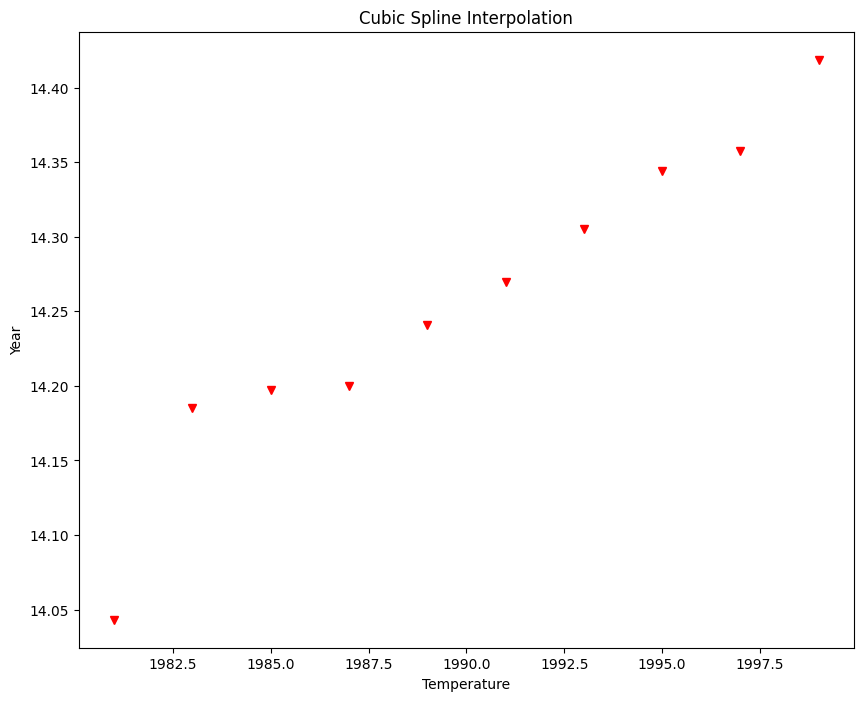

In [30]:
from scipy.interpolate import CubicSpline
sortedX = X.copy()
sortedY = Y.copy()
sortedX.sort()
sortedY.sort()
f = CubicSpline(sortedY, sortedX, bc_type='natural')
y_new = np.linspace(0, 2, 100)
x_new = f(y_new)

print(x)
print(y)

plt.figure(figsize=(10,8))
#plt.plot(y_new, x_new, 'c')
plt.plot(sortedY, sortedX, 'rv')
plt.title('Cubic Spline Interpolation')
plt.xlabel("Temperature")
plt.ylabel("Year")
plt.show()

b) Perform a least-square regression of the above data to estimate
the temperature in even years

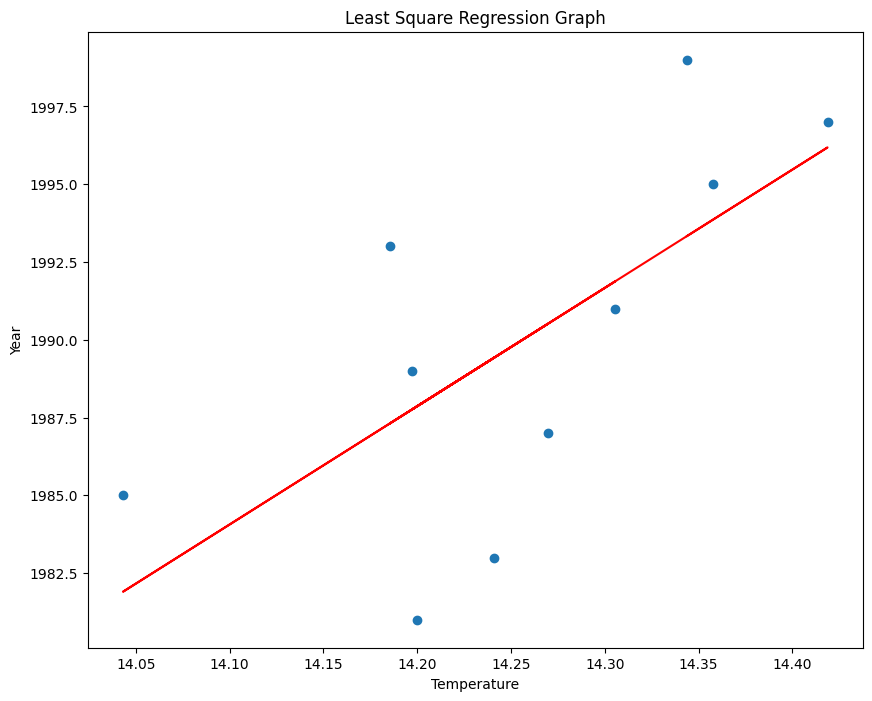

In [5]:
A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), y)

gradient = alpha[0]*x + alpha[1]

plt.figure(figsize=(10,8))
plt.plot(x, y, 'o')
plt.plot(x, gradient, 'r')
plt.xlabel("Temperature")
plt.ylabel("Year")
plt.title('Least Square Regression Graph')
plt.show()

c) Perform an analysis of the difference between the results of the regression
and interpolations you can above, explain based on the theoretical basis you
have learned.

d) Make a plot that describes the relationship between Temperature(y) and
Year(x) as informatively as possible for the reader, based on the results
of your analysis using Python library.

# Number 2
Compute the fourth order Taylor Expansion for $sin(x)$ and $cos(x)$ and 
$sin(x)cos(x)$ around 0.  

a) Write down your manual calculation and Python script to answer above's 
question  
Manual Calculation:  
![]()

/tmp/ipykernel_11004/380154645.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)


[-3.14159265 -3.11001886 -3.07844506 -3.04687127 -3.01529747 -2.98372368
 -2.95214988 -2.92057608 -2.88900229 -2.85742849 -2.8258547  -2.7942809
 -2.76270711 -2.73113331 -2.69955952 -2.66798572 -2.63641193 -2.60483813
 -2.57326433 -2.54169054 -2.51011674 -2.47854295 -2.44696915 -2.41539536
 -2.38382156 -2.35224777 -2.32067397 -2.28910017 -2.25752638 -2.22595258
 -2.19437879 -2.16280499 -2.1312312  -2.0996574  -2.06808361 -2.03650981
 -2.00493602 -1.97336222 -1.94178842 -1.91021463 -1.87864083 -1.84706704
 -1.81549324 -1.78391945 -1.75234565 -1.72077186 -1.68919806 -1.65762426
 -1.62605047 -1.59447667 -1.56290288 -1.53132908 -1.49975529 -1.46818149
 -1.4366077  -1.4050339  -1.3734601  -1.34188631 -1.31031251 -1.27873872
 -1.24716492 -1.21559113 -1.18401733 -1.15244354 -1.12086974 -1.08929595
 -1.05772215 -1.02614835 -0.99457456 -0.96300076 -0.93142697 -0.89985317
 -0.86827938 -0.83670558 -0.80513179 -0.77355799 -0.74198419 -0.7104104
 -0.6788366  -0.64726281 -0.61568901 -0.58411522 -0.5

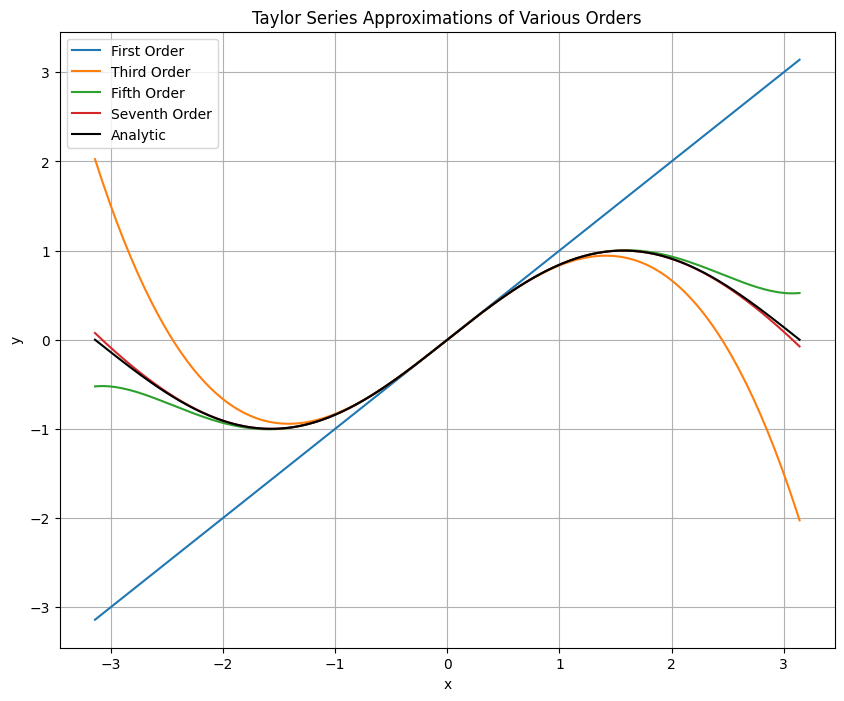

In [7]:
# Python Script

# taylor expansion of sin(x)
x = np.linspace (-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize=(10,8))
for n, label in zip(range(4), labels): 
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    print(f"{y} + {(-1)**n * x**(2*n+1)}")
    plt.plot(x, y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

/tmp/ipykernel_6335/2187813794.py:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y = y + ((-1)**n * (x)**(2*n)) / np.math.factorial(2*n)


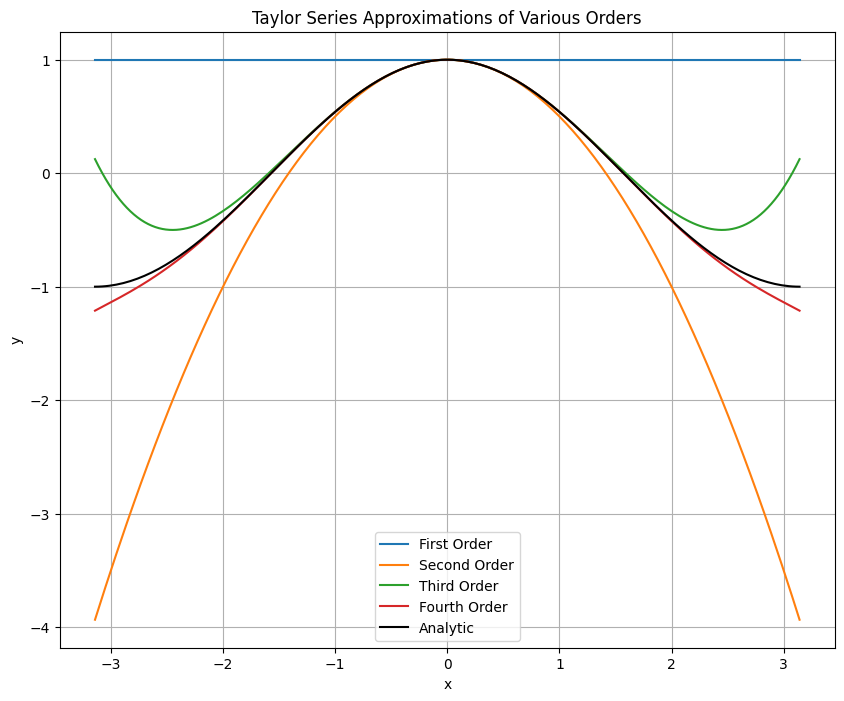

In [27]:
# taylor expansion of cos(x)
x = np.linspace (-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Second Order', 'Third Order', 'Fourth Order']

plt.figure(figsize=(10,8))
for n, label in zip(range(4), labels): 
    y = y + ((-1)**n * (x)**(2*n)) / np.math.factorial(2*n)
    plt.plot(x, y, label = label)

plt.plot(x, np.cos(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

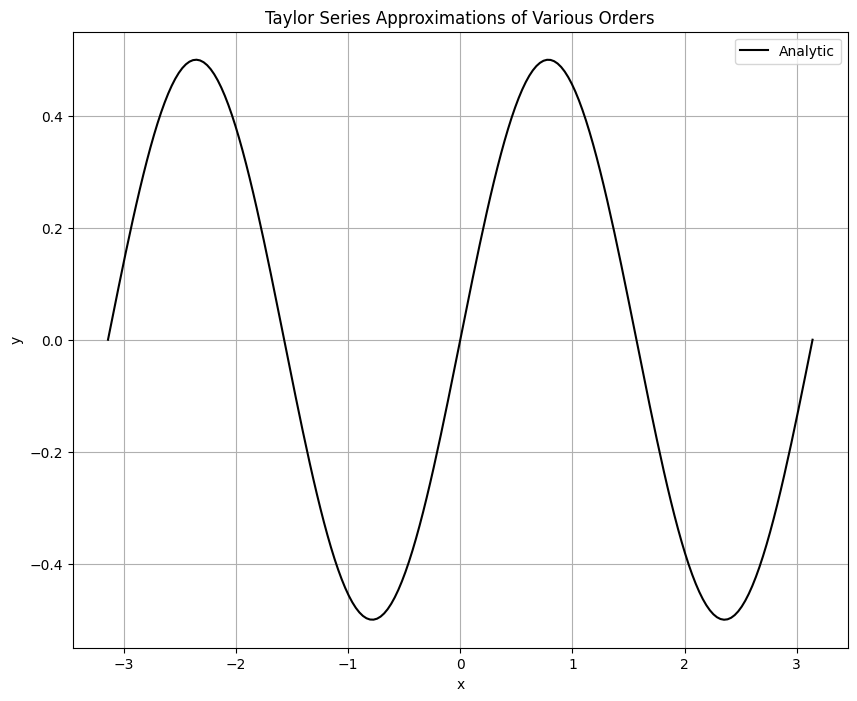

In [25]:
# taylor expansion of sin(x)cos(x)
x = np.linspace (-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Second Order', 'Third Order', 'Fourth Order']

plt.figure(figsize=(10,8))
for n, label in zip(range(4), labels): 
    plt.plot(x, y, label = label)

plt.plot(x, np.cos(x)*np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()